### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset & Extracting Features

In [3]:

dis = pd.read_csv('../../../data/dateset1/Training.csv')
X = dis.iloc[ : , :-1]
y = dis.iloc[:, -1]
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


### Data Splitting & Preprocessing 

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Model Training & Predicting

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Model Evalaution

In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print()
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred))

0.9024390243902439



### Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score
cVal = 10

In [118]:
score = cross_val_score(clf, X_train, y_train,cv=cVal)
print(score) 
print(score.mean()) 


[0.90144928 0.89855072 0.90724638 0.89565217 0.90116279 0.91860465
 0.93023256 0.88953488 0.89244186 0.91860465]
0.9053479946073477


### HyperParameter Tuning


In [119]:
from sklearn.model_selection import GridSearchCV
# clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=5)
param_grid = {'criterion':["gini", "entropy", "log_loss"],
               'max_depth' : list(range(1,11))}


grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cVal)
grid_search.fit(X_train, y_train)

In [120]:
# pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [121]:
# grid_search.best_params_

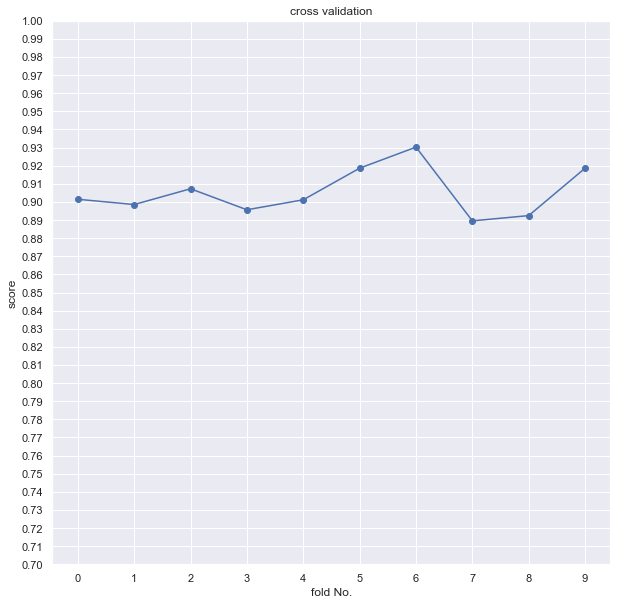

In [122]:
plt.figure(figsize=(10, 10))
plt.plot(range(0,cVal), score)
plt.scatter(range(0,cVal), score)


plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0.7, 1, 0.01))

plt.show()

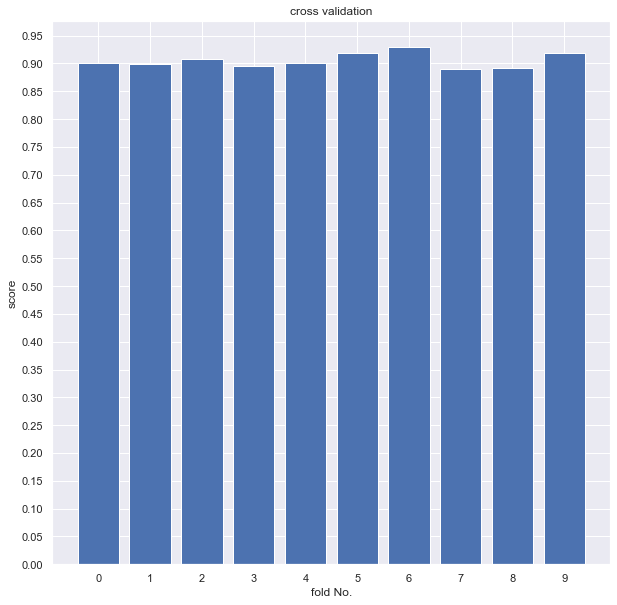

In [123]:
plt.figure(figsize=(10, 10))
plt.bar(range(0,cVal), score)
# plt.plot(range(0,20), scores)

plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0, 1, 0.05))

plt.show()